In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [11]:
df = pd.read_csv('Used_Bikes.csv')
df.head()
df.info()
# df.drop_duplicates(inplace=True)
# df = df.dropna(axis=1)
# df = df.dropna()
# # df.info()
# df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
9369,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
9370,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


In [20]:
df.isnull().sum()
##to delete the null values 
# df.dropna(inplace=True)
# df.isnull().sum()


bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [21]:
##dublicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [22]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [23]:
num_cols = df.select_dtypes(exclude=['object'])
num_cols.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [28]:
cat_cols = df.drop(["bike_name", "city"], axis=1)
cat_cols.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,10000.0,First Owner,3.0,150.0,Yamaha


In [ ]:
this have to change


In [ ]:
# cat --> num
## label encoding
## one hot encoding

In [30]:
pd.get_dummies(cat_cols).astype(int).head()

,price,kms_driven,age,power,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000,17654,3,110,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900,11000,4,350,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000,110,8,675,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000,16329,4,180,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000,10000,3,150,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
##label encoding -->ordinal encoding
dt = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth Owner Or Owner": 4,
}
cat_cols["owner"] = cat_cols["owner"].map(dt)
cat_cols.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,NaN,3.0,110.0,TVS
1,119900.0,11000.0,NaN,4.0,350.0,Royal Enfield
2,600000.0,110.0,NaN,8.0,675.0,Triumph
3,65000.0,16329.0,NaN,4.0,180.0,TVS
4,80000.0,10000.0,NaN,3.0,150.0,Yamaha


In [46]:
{i:key for key ,i in enumerate(list(cat_cols['brand'].unique()))} 

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [47]:
df1 = {'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [53]:
# final_df = pd.concat([cat_cols, num_cols], axis=1)
# final_df.head()
# The code runs pd.concat([cat_cols, num_cols], axis=1), but cat_cols already contains all columns from num_cols,
# so concatenating them will duplicate columns and may cause issues.
# Also, if you want to encode the 'brand' column using df1, you should do it before concatenation.

# To fix: encode 'brand' column in cat_cols using df1
cat_cols['brand'] = cat_cols['brand'].map(df1)
final_df = cat_cols
final_df.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,NaN,3.0,110.0,0
1,119900.0,11000.0,NaN,4.0,350.0,1
2,600000.0,110.0,NaN,8.0,675.0,2
3,65000.0,16329.0,NaN,4.0,180.0,0
4,80000.0,10000.0,NaN,3.0,150.0,3


In [54]:
matrix = final_df.corr()
matrix


,price,kms_driven,owner,age,power,brand
price,1.000000,-0.199951,NaN,-0.248752,0.807641,0.288409
kms_driven,-0.199951,1.000000,NaN,0.367518,-0.168295,-0.036161
owner,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.248752,0.367518,NaN,1.000000,-0.164211,-0.030263
power,0.807641,-0.168295,NaN,-0.164211,1.000000,0.068647
brand,0.288409,-0.036161,NaN,-0.030263,0.068647,1.000000


<Axes: >

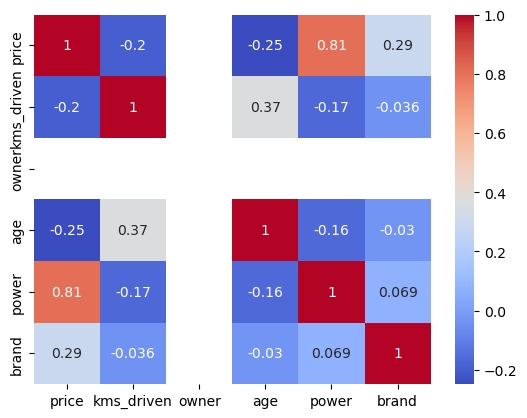

In [59]:
sns.heatmap(matrix, annot=True, cmap='coolwarm')

In [61]:
x = final_df.drop("price", axis=1)
y = final_df["price"]

In [ ]:
# cat_cols["owner"] = cat_cols["owner"].map(dt)
# # cat_cols.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,NaN,3.0,110.0,TVS
1,119900.0,11000.0,NaN,4.0,350.0,Royal Enfield
2,600000.0,110.0,NaN,8.0,675.0,Triumph
3,65000.0,16329.0,NaN,4.0,180.0,TVS
4,80000.0,10000.0,NaN,3.0,150.0,Yamaha


In [ ]:
from sklearn.model_selection import train_test_split